# Bike Sharing Assignment

### Problem Statement

##### About BoomBikes

A bike-sharing system in which bikes are made available for shared use to individuals on a short term basis for a
price or free. It allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the
user enters the payment information, and the system unlocks it. This bike can then be returned to another dock
belonging to the same system.

##### Business Objective

A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BikeIndia aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

#### Business Goal

The objective is to model the demand for shared bikes with
the available independent variables. It will be used by the management to
understand how exactly the demands vary with different features. They can
accordingly manipulate the business strategy to meet the demand levels and
meet the customer's expectations. Further, the model will be a good way for
management to understand the demand dynamics of a new market.

#### Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Step 1: Data reading and understanding

In [4]:
df = pd.read_csv('day.csv')

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Column Details From Data Dictionary [Data Understanding]

1. instant: record index
2. dteday : date
3. season : season (1:spring, 2:summer, 3:fall, 4:winter)
4. yr : year (0: 2018, 1:2019)
5. mnth : month ( 1 to 12)
6. holiday : weather day is a holiday or not (extracted from
http://dchr.dc.gov/page/holiday-schedule)
7. weekday : day of the week
8. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
9. weathersit : 
<br>1. Clear, Few clouds, Partly cloudy, Partly cloudy 
<br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
<br>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
10. temp : temperature in Celsius
11. atemp: feeling temperature in Celsius
12. hum: humidity
13. windspeed: wind speed
14. casual: count of casual users
15. registered: count of registered users
16. cnt: count of total rental bikes including both casual and registered

#### Data Cleaning

In [8]:
# Column instant is index column so we will drop it
df = df.drop('instant', axis = 1)

In [9]:
# Column 'cnt' is sum of 'casual' and 'registered' so we can drop 'casual' and 'registered'. In our problem statement we only talk about total demand.
df = df.drop(columns=['casual', 'registered'], axis = 1)

In [10]:
# Columns dteday is a date column and we can drop it as we already have separate columns for 'year' & 'month'.
df = df.drop('dteday', axis = 1)

In [11]:
column_names = list(df.columns)
column_names

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt']

In [12]:
df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
windspeed     649
atemp         689
cnt           695
dtype: int64

1. Categorical Variables
  - Season, yr, mnth, holiday, weekday, workingday, weathersit.
2. Continuous Variables
  - Temp, atemp, hum, windspeed
3. Target Variables
  - cnt

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [14]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [15]:
# Categorical columns as given as numerical columns we will convert those columns to categorical 
# Season, mnth, workingday, weathersit.

df['season'] = df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth'] = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit'] = df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday'] = df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

# We will not convert yr, holiday and workingday as they are binary variables

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

In [17]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()
    for rect in ax.patches:
        
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
    
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      

### Categorical Variables
 1. Season, yr, mnth, holiday, weekday, workingday, weathersit.

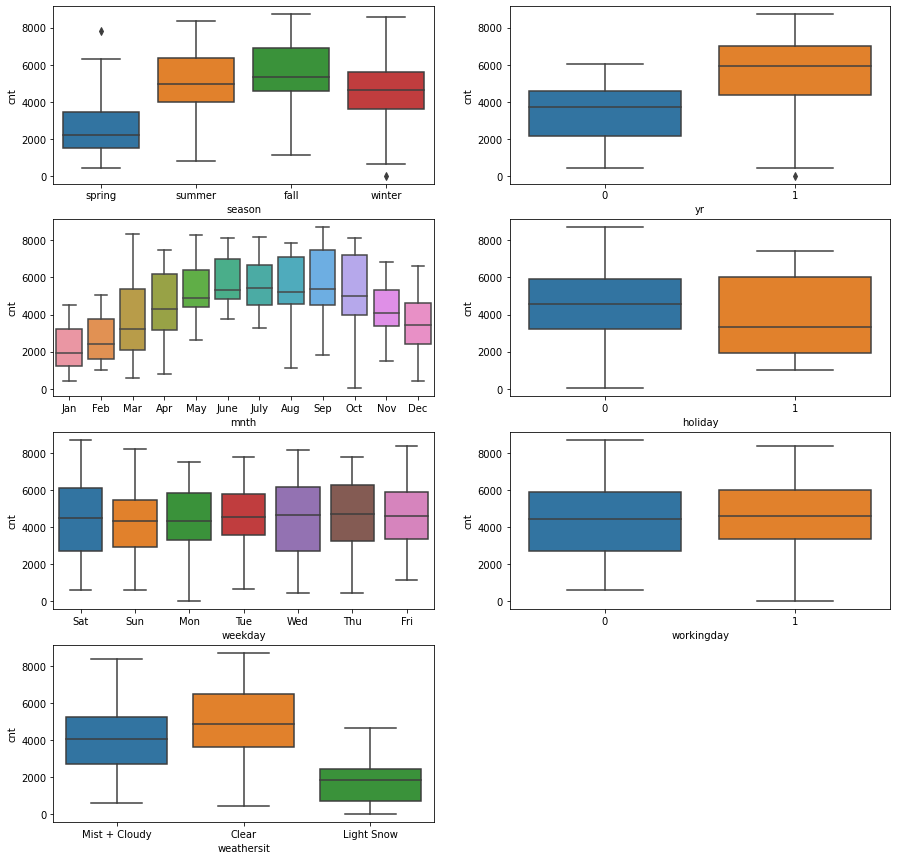

In [18]:
plt.subplots(figsize=(15,15))
plt.subplot(4, 2, 1)
sns.boxplot(x = df.season, y = df.cnt)
plt.subplot(4, 2, 2)
sns.boxplot(x = df.yr, y = df.cnt)
plt.subplot(4, 2, 3)
sns.boxplot(x = df.mnth, y = df.cnt)
plt.subplot(4, 2, 4)
sns.boxplot(x = df.holiday, y = df.cnt)
plt.subplot(4, 2, 5)
sns.boxplot(x = df.weekday, y = df.cnt)
plt.subplot(4, 2, 6)
sns.boxplot(x = df.workingday, y = df.cnt)
plt.subplot(4, 2, 7)
sns.boxplot(x = df.weathersit, y = df.cnt)
plt.show()

##### 1. Season

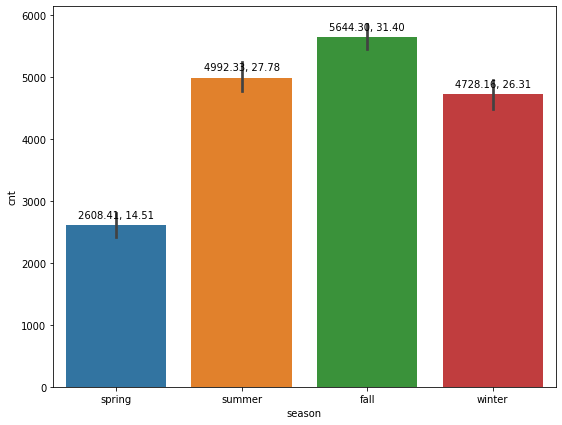

In [19]:
plt.figure(figsize=(9,7))
ax = sns.barplot(x = df.season, y = df.cnt)
label_values(ax)
plt.show()

##### 2. Yr

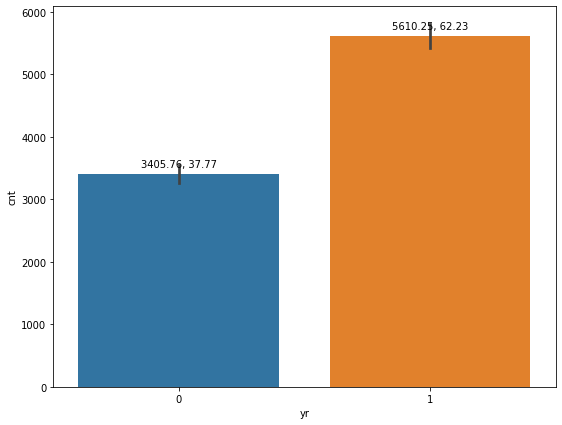

In [20]:
plt.figure(figsize=(9,7))
ax = sns.barplot(x = df.yr, y = df.cnt)
label_values(ax)
plt.show()

##### 3. mnth

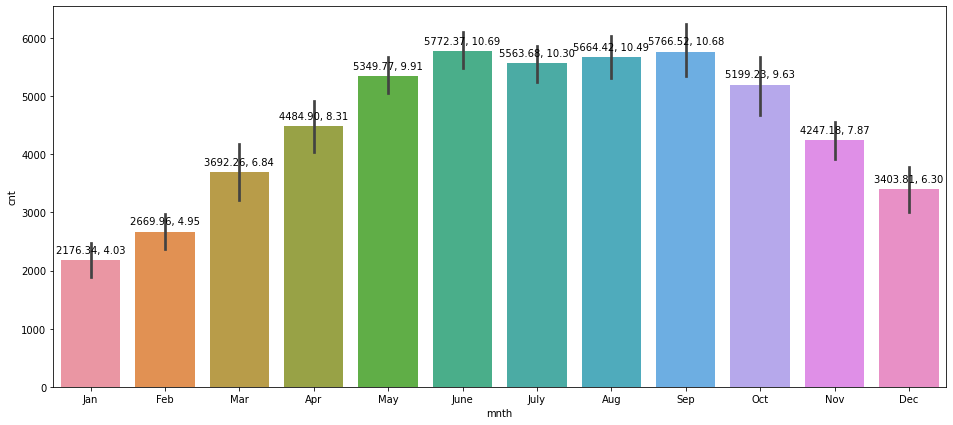

In [21]:
plt.figure(figsize=(16,7))
ax = sns.barplot(x = df.mnth, y = df.cnt)
label_values(ax)
plt.show()

##### 4. holiday

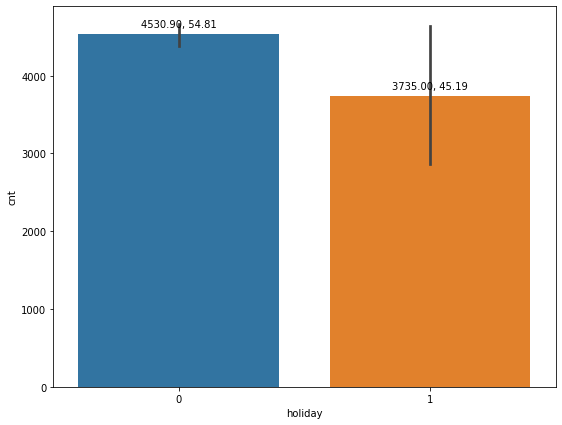

In [22]:
plt.figure(figsize=(9,7))
ax = sns.barplot(x = df.holiday, y = df.cnt)
label_values(ax)
plt.show()

##### 5. weekday

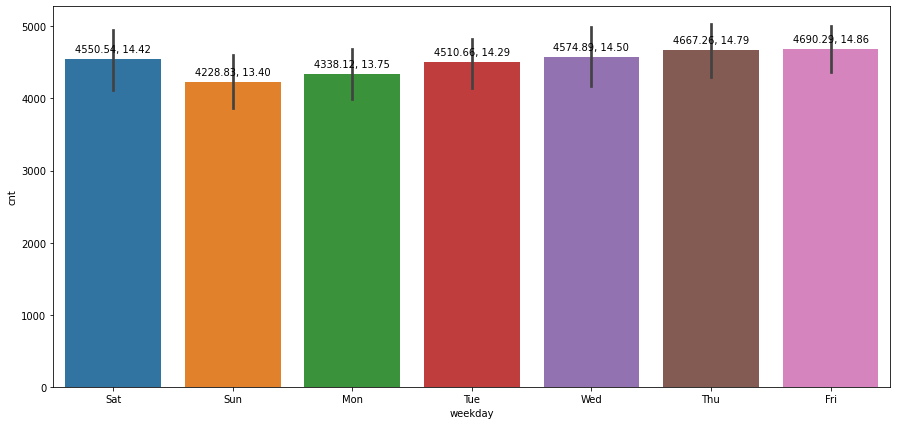

In [23]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = df.weekday, y = df.cnt)
label_values(ax)
plt.show()

##### 6. workingday

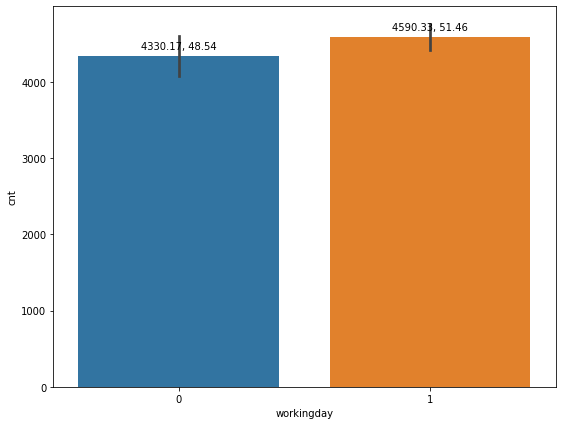

In [24]:
plt.figure(figsize=(9,7))
ax = sns.barplot(x = df.workingday, y = df.cnt)
label_values(ax)
plt.show()

##### 7. weathersit

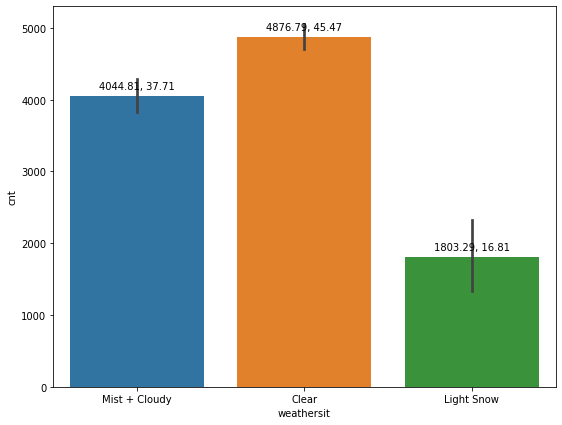

In [25]:
plt.figure(figsize=(9,7))
ax = sns.barplot(x = df.weathersit, y = df.cnt)
label_values(ax)
plt.show()

##### Insights from categorical variables

1. Season: (1:spring, 2:summer, 3:fall, 4:winter)
<br>- In spring we can infer that cnt is lowest as compared to the other seasons. 
<br> - In summer and fall there is not much difference but in fall there is slightly higher cnt when compared with summer.
2. Year: (0: 2018, 1:2019)
<br>- With increasing year demand also increased.
3. Weathersit:
<br> - In Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, there is no demand in the past.
<br> - In Clear, Few clouds, Partly cloudy, Partly cloudy, the demand is the highest as compared to other.
<br> - As expected whether weather is rainy there is trend of lower demand.
4. Weekday:
<br> - Weekdays do not have much effect on the demand.
5. Working Day:
<br> - Working days do not have much effect on the demand.
6. Holiday:
<br> - Unlike our expectation, we can see slightly higher demand on non-holiday as compared to holiday.
7. Month:
<br> - In the middle months there is higher demand.
<br> - With increasing month demand also increases and it decreases in the last two months.


### Numerical Variables

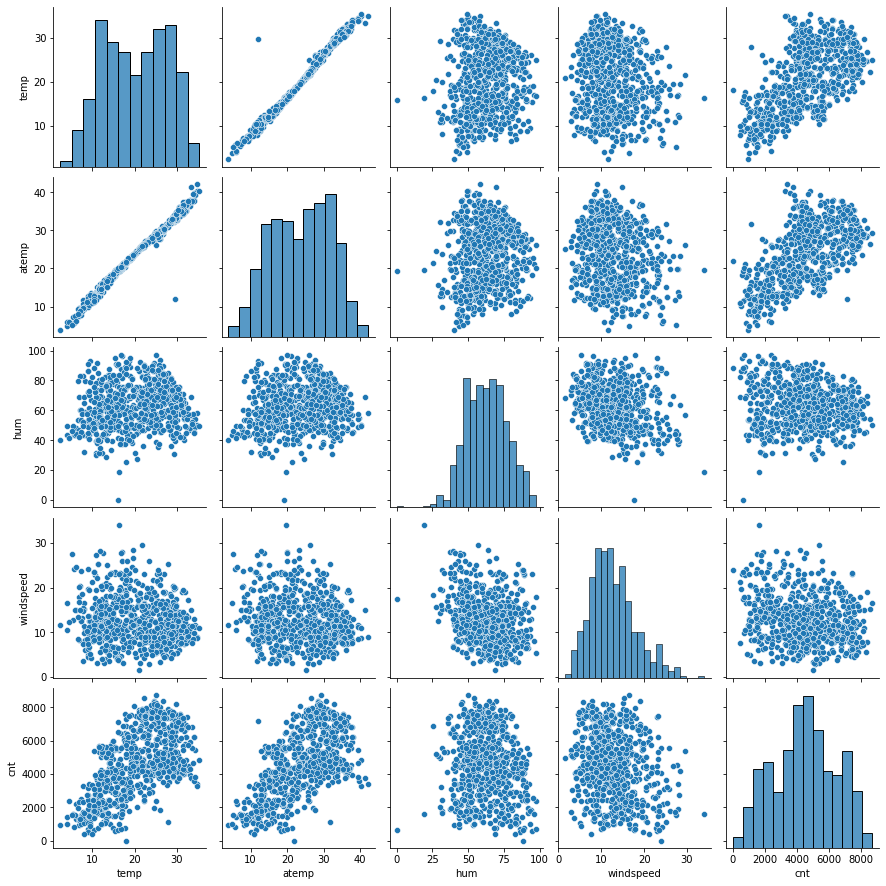

In [26]:
# visualizing numerical columns
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

High correlation between 'temp' and 'atemp'. We can drop one of these columns.

In [27]:
# Drop the 'temp' columns from the dataframe. As feeling temperature is more important as compare to the general temperature
df = df.drop('temp', axis = 1)

'atemp' has the highest correlation with the dependent/target variable.

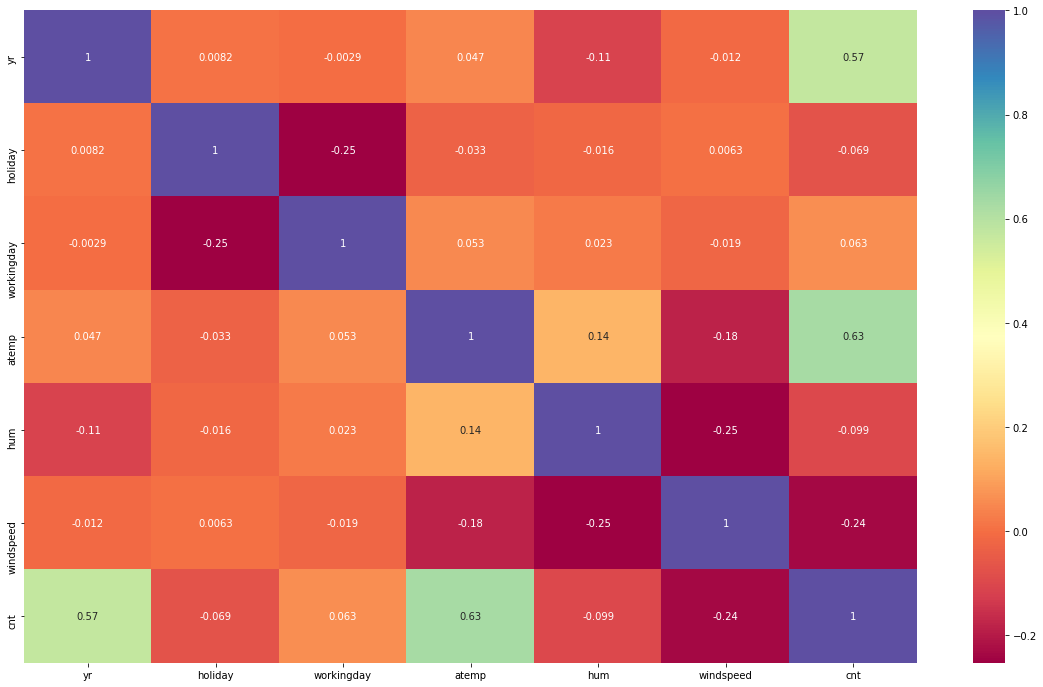

In [28]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

- All above plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model
- So yes we can consider a Linear Regression Model.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


## Step 3: Data Preparation

#### Dummy Variables

In [30]:
# Get the dummy variables for month, season, weathersit, weekday
# Let's drop the first column from  using 'drop_first = True' as first column can be derived using other columns 
# (dropping redundant column)

seasons = pd.get_dummies(df.season, drop_first=True)
mnth = pd.get_dummies(df.mnth, drop_first=True)
weekdays = pd.get_dummies(df.weekday, drop_first=True)
weather_sit = pd.get_dummies(df.weathersit, drop_first=True)

In [31]:
# Concat the dummy columns to the dataframe
df = pd.concat([mnth, weekdays, weather_sit, seasons, df],axis=1)
df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


In [32]:
# Dropping 'season','month','weekday','weathersit' as we have concatenated the dummies in our original dataframe
df.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)
df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,11.46350,43.6957,12.522300,1600


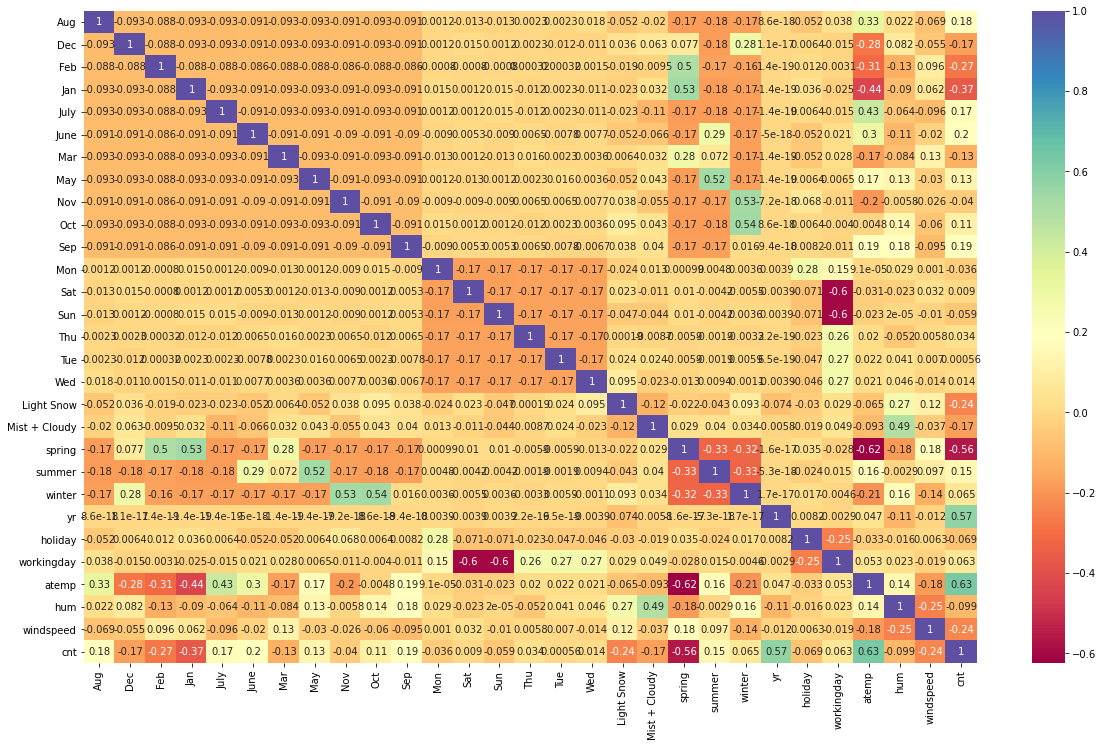

In [33]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

## Step 4: Split the data into Training and Testing Sets

In [34]:
# We will divide the training and testing set in 70% and 30% respectively
# We used random_state = 100 so that everytime we run it we will have same set of training and testing set
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [35]:
df_train.shape, df_test.shape

((510, 29), (220, 29))

##### Rescaling the continuos variables

Scaling is a method to normalize any range of data or continuous variable. By scaling we convert the continuous variables into ranges.
<br> Reason to perform it:
<br> 1. To make the coefficient of our predictors comparable/interpretable. Since some features have different scales, there is a chance that higher weightage is given to features with higher magnitude which should not be the case. Scaling helps to handle it well.
<br> 2. Scaling makes the optimization function efficient. Gradient descent is an optimization technique which is used to get the optimized values of predictor coefficient. Scaling sometimes improves the performance of this technique by improving the convergence speed of the algorithm.


Normalisation/Min-Max Scaling = (x-xmin)/(x max-x min)
<br> - It shifts and rescales in such a way that they end up ranging between 0 and 1.

Standardisation = (x-mu)/ sigma
<br> - Standard Scaling scales values in such a way that they are centered around the mean with a unit standard deviation i.e. the mean of the features becomes 0 and the resultant distribution has a unit standard deviation.

Standardization can be helpful in cases where the data follows a Normal distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. 
<br> So Normalisation even handles outliers in our data. Due to this reason we will use Min-Max Scaling.

In [36]:
# MinMaxScaler Object
scaler = MinMaxScaler()

In [37]:
# Apply scaler object to all the continuous columns 
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

In [38]:
# Fit and Transform the data
# Fit will calculate our Min and Max values
# Transform will operate on standardisation function and scales our values
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
df_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.391735,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.318819,0.751824,0.380981,0.191095


In [40]:
df_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building

In [41]:
#Divide the data into X and y

y_train = df_train.pop('cnt')
X_train = df_train

In [42]:
X_train.shape, y_train.shape

((510, 28), (510,))

## Step 5: Building a Linear Model

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [43]:
X_train_const = sm.add_constant(X_train)

In [44]:
lm = sm.OLS(y_train, X_train_const).fit()  

In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.07e-179
Time:                        23:35:32   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     482   BIC:                            -871.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2594      0.035      7.397      0.000       0.190       0.328
Aug               0.0419      0.033      1.257      0.209      -0.024       0.107
Dec              -0.0526      0.034     -1.560      0.120      -0.119       0.014
Feb              -0.0404      0.033     -1.221      0.223      -0.105       0.025
Jan              -0.0736      0.034     -2.188      0.029      -0.140      -0.007
July             -0.0147      0.035     -0.424      0.672      -0.083       0.053
June              0.0242      0.024      1.000      0.318      -0.023       0.072
Mar              -0.0003      0.025     -0.014      0.989      -0.049       0.048
May               0.0363      0.021      1.734      0.084      -0.005       0.077
Nov              -0.0457      0.037     -1.249      0.212      -0.118       0.026
Oct               0.0076      0.036      0.210      0.833      -0.063       0.079
Sep               0.0957      0.032      2.984      0.003       0.033       0.159
Mon              -0.0263      0.015     -1.702      0.089      -0.057       0.004
Sat               0.0961      0.014      6.934      0.000       0.069       0.123
Sun               0.0417      0.014      2.964      0.003       0.014       0.069
Thu              -0.0131      0.016     -0.835      0.404      -0.044       0.018
Tue              -0.0214      0.016     -1.368      0.172      -0.052       0.009
Wed              -0.0082      0.015     -0.545      0.586      -0.038       0.021
Light Snow       -0.2530      0.027     -9.497      0.000      -0.305      -0.201
Mist + Cloudy    -0.0612      0.010     -5.830      0.000      -0.082      -0.041
spring           -0.0519      0.030     -1.724      0.085      -0.111       0.007
summer            0.0348      0.026      1.327      0.185      -0.017       0.086
winter            0.1015      0.028      3.612      0.000       0.046       0.157
yr                0.2344      0.008     28.934      0.000       0.218       0.250
holiday           0.0212      0.024      0.882      0.378      -0.026       0.068
workingday        0.1004      0.012      8.176      0.000       0.076       0.124
atemp             0.4160      0.045      9.174      0.000       0.327       0.505
hum              -0.1459      0.039     -3.761      0.000      -0.222      -0.070
windspeed        -0.1683      0.026     -6.488      0.000      -0.219      -0.117
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.432
Skew:                          -0.787   Prob(JB):                     7.63e-57
Kurtosis:                       6.112   Cond. No.                     8.06e+15
================================================================

There are too many variables with high p-values so we will remove some variables using RFE.

**RFE (Recursive feature elimination)**

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE 
# For the first model we are taking half features
rfe = RFE(lm, 14)             
rfe = rfe.fit(X_train, y_train)

In [48]:
# Column name, RFE is True/False, Ranking of column
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('Aug', True, 1),
 ('Dec', False, 4),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('July', False, 10),
 ('June', False, 8),
 ('Mar', False, 12),
 ('May', False, 7),
 ('Nov', False, 5),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 15),
 ('Tue', False, 11),
 ('Wed', False, 13),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', False, 2),
 ('spring', False, 6),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [49]:
# Columns with RFE Support as True
col = X_train.columns[rfe.support_]
len(col), col

(14,
 Index(['Aug', 'Jan', 'Sep', 'Sat', 'Sun', 'Light Snow', 'summer', 'winter',
        'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed'],
       dtype='object'))

In [50]:
# Columns with RFE Support as False
X_train.columns[~rfe.support_]

Index(['Dec', 'Feb', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Thu',
       'Tue', 'Wed', 'Mist + Cloudy', 'spring'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [51]:
# Creating X_train_rfe dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [52]:
# Adding a constant to X_train_rfe as statsmodel does not include it. We have to explicitly define it.

X_train_rfe_const = sm.add_constant(X_train_rfe)

In [53]:
# Running the linear model

lm1 = sm.OLS(y_train, X_train_rfe_const).fit()   

In [54]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.53e-183
Time:                        23:35:35   Log-Likelihood:                 496.13
No. Observations:                 510   AIC:                            -964.3
Df Residuals:                     496   BIC:                            -905.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2127      0.023      9.432      0.000       0.168       0.257
Aug            0.0584      0.017      3.527      0.000       0.026       0.091
Jan           -0.0410      0.018     -2.274      0.023      -0.076      -0.006
Sep            0.1180      0.017      7.092      0.000       0.085       0.151
Sat            0.0910      0.011      7.944      0.000       0.068       0.113
Sun            0.0447      0.012      3.757      0.000       0.021       0.068
Light Snow    -0.1918      0.026     -7.471      0.000      -0.242      -0.141
summer         0.0906      0.012      7.814      0.000       0.068       0.113
winter         0.1344      0.012     11.314      0.000       0.111       0.158
yr             0.2284      0.008     27.418      0.000       0.212       0.245
holiday       -0.0064      0.022     -0.295      0.768      -0.049       0.036
workingday     0.0833      0.009      9.067      0.000       0.065       0.101
atemp          0.5640      0.026     21.601      0.000       0.513       0.615
hum           -0.2799      0.032     -8.807      0.000      -0.342      -0.217
windspeed     -0.1891      0.026     -7.169      0.000      -0.241      -0.137
==============================================================================
Omnibus:                       57.362   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.932
Skew:                          -0.611   Prob(JB):                     6.10e-29
Kurtosis:                       5.150   Cond. No.                     7.08e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.82e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. The formula for calculating VIF is:

$$ VIF_i = \frac{1}{1 - {R_i}^2} $$

If all the independent variables are orthogonal to each other, then VIF = 1.0

 If there is perfect correlation, then VIF = infinity. A large value of VIF indicates that there is a correlation between the variables.

In [55]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()

X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,31.06
3,Sat,7.74
4,Sun,7.43
9,holiday,2.08
11,atemp,1.82
7,winter,1.56
1,Jan,1.55
6,summer,1.48
0,Aug,1.41
12,hum,1.27


We will drop 'holiday' as it p-value is greater than 0.05 and VIF is also inf.

In [56]:
# Drop Holiday
X_train_rfe2 = X_train_rfe.drop('holiday', axis = 1)

##### Rebuilding the model without Holiday

In [57]:
# Add Constant
X_train_rfe2_const = sm.add_constant(X_train_rfe2)

In [58]:
lm2 = sm.OLS(y_train, X_train_rfe2_const).fit()

In [59]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.53e-183
Time:                        23:35:36   Log-Likelihood:                 496.13
No. Observations:                 510   AIC:                            -964.3
Df Residuals:                     496   BIC:                            -905.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2063      0.037      5.557      0.000       0.133       0.279
Aug            0.0584      0.017      3.527      0.000       0.026       0.091
Jan           -0.0410      0.018     -2.274      0.023      -0.076      -0.006
Sep            0.1180      0.017      7.092      0.000       0.085       0.151
Sat            0.0974      0.028      3.489      0.001       0.043       0.152
Sun            0.0511      0.028      1.818      0.070      -0.004       0.106
Light Snow    -0.1918      0.026     -7.471      0.000      -0.242      -0.141
summer         0.0906      0.012      7.814      0.000       0.068       0.113
winter         0.1344      0.012     11.314      0.000       0.111       0.158
yr             0.2284      0.008     27.418      0.000       0.212       0.245
workingday     0.0897      0.026      3.396      0.001       0.038       0.142
atemp          0.5640      0.026     21.601      0.000       0.513       0.615
hum           -0.2799      0.032     -8.807      0.000      -0.342      -0.217
windspeed     -0.1891      0.026     -7.169      0.000      -0.241      -0.137
==============================================================================
Omnibus:                       57.362   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.932
Skew:                          -0.611   Prob(JB):                     6.10e-29
Kurtosis:                       5.150   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is no different in adjusted R-squared value after removing holiday. We will continue with our model to get better model.

In [60]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()

X = X_train_rfe2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,hum,19.58
9,workingday,15.65
10,atemp,11.28
12,windspeed,4.37
3,Sat,4.27
4,Sun,4.12
8,yr,2.06
7,winter,2.02
6,summer,1.97
1,Jan,1.60


We will drop 'Sun' as it p-value is greater than 0.05 and VIF is also around 5.

In [61]:
# Drop Sun
X_train_rfe3 = X_train_rfe2.drop('Sun', axis = 1)

##### Rebuilding the model without Sun

In [62]:
# Add Constant
X_train_rfe3_const = sm.add_constant(X_train_rfe3)

In [63]:
lm3 = sm.OLS(y_train, X_train_rfe3_const).fit()

In [64]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.8
Date:                Wed, 05 May 2021   Prob (F-statistic):          5.39e-184
Time:                        23:35:37   Log-Likelihood:                 494.44
No. Observations:                 510   AIC:                            -962.9
Df Residuals:                     497   BIC:                            -907.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2482      0.029      8.494      0.000       0.191       0.306
Aug            0.0586      0.017      3.531      0.000       0.026       0.091
Jan           -0.0415      0.018     -2.297      0.022      -0.077      -0.006
Sep            0.1162      0.017      6.979      0.000       0.083       0.149
Sat            0.0540      0.015      3.714      0.000       0.025       0.083
Light Snow    -0.1912      0.026     -7.430      0.000      -0.242      -0.141
summer         0.0911      0.012      7.840      0.000       0.068       0.114
winter         0.1340      0.012     11.253      0.000       0.111       0.157
yr             0.2286      0.008     27.376      0.000       0.212       0.245
workingday     0.0462      0.011      4.102      0.000       0.024       0.068
atemp          0.5656      0.026     21.622      0.000       0.514       0.617
hum           -0.2783      0.032     -8.740      0.000      -0.341      -0.216
windspeed     -0.1896      0.026     -7.174      0.000      -0.242      -0.138
==============================================================================
Omnibus:                       61.801   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.241
Skew:                          -0.641   Prob(JB):                     1.75e-32
Kurtosis:                       5.289   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()

X = X_train_rfe3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,14.42
9,atemp,10.27
8,workingday,4.59
11,windspeed,3.76
7,yr,2.04
6,winter,2.00
5,summer,1.96
3,Sat,1.81
0,Aug,1.55
1,Jan,1.54


We will drop 'Jan' as it has high p-value.

In [66]:
# Drop hum
X_train_rfe4 = X_train_rfe3.drop('Jan', axis = 1)

##### Rebuilding the model without hum

In [67]:
# Add Constant
X_train_rfe4_const = sm.add_constant(X_train_rfe4)

In [68]:
lm4 = sm.OLS(y_train, X_train_rfe4_const).fit()

In [69]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.1
Date:                Wed, 05 May 2021   Prob (F-statistic):          4.83e-184
Time:                        23:35:38   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -959.5
Df Residuals:                     498   BIC:                            -908.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2281      0.028      8.147      0.000       0.173       0.283
Aug            0.0614      0.017      3.696      0.000       0.029       0.094
Sep            0.1192      0.017      7.152      0.000       0.086       0.152
Sat            0.0535      0.015      3.663      0.000       0.025       0.082
Light Snow    -0.1875      0.026     -7.268      0.000      -0.238      -0.137
summer         0.0981      0.011      8.713      0.000       0.076       0.120
winter         0.1449      0.011     13.212      0.000       0.123       0.166
yr             0.2276      0.008     27.176      0.000       0.211       0.244
workingday     0.0461      0.011      4.068      0.000       0.024       0.068
atemp          0.5935      0.023     25.502      0.000       0.548       0.639
hum           -0.2851      0.032     -8.954      0.000      -0.348      -0.223
windspeed     -0.1828      0.026     -6.929      0.000      -0.235      -0.131
==============================================================================
Omnibus:                       59.666   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.162
Skew:                          -0.613   Prob(JB):                     4.96e-32
Kurtosis:                       5.298   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()

X = X_train_rfe4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,hum,11.87
8,atemp,8.70
7,workingday,4.53
10,windspeed,3.74
6,yr,2.02
4,summer,1.83
2,Sat,1.79
5,winter,1.73
0,Aug,1.54
1,Sep,1.29


We will drop 'hum' due to high VIF.

In [71]:
X_train_rfe5 = X_train_rfe4.drop('hum', axis = 1)

In [72]:
# Add Constant
X_train_rfe5_const = sm.add_constant(X_train_rfe5)

In [73]:
lm5 = sm.OLS(y_train, X_train_rfe5_const).fit()

In [74]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     203.9
Date:                Wed, 05 May 2021   Prob (F-statistic):          3.94e-169
Time:                        23:35:40   Log-Likelihood:                 453.68
No. Observations:                 510   AIC:                            -885.4
Df Residuals:                     499   BIC:                            -838.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0422      0.020      2.088      0.037       0.002       0.082
Aug            0.0509      0.018      2.854      0.004       0.016       0.086
Sep            0.1006      0.018      5.652      0.000       0.066       0.136
Sat            0.0582      0.016      3.707      0.000       0.027       0.089
Light Snow    -0.2486      0.027     -9.286      0.000      -0.301      -0.196
summer         0.0876      0.012      7.273      0.000       0.064       0.111
winter         0.1258      0.012     10.868      0.000       0.103       0.149
yr             0.2345      0.009     26.122      0.000       0.217       0.252
workingday     0.0471      0.012      3.865      0.000       0.023       0.071
atemp          0.5713      0.025     22.938      0.000       0.522       0.620
windspeed     -0.1255      0.028     -4.556      0.000      -0.180      -0.071
==============================================================================
Omnibus:                       64.064   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.378
Skew:                          -0.709   Prob(JB):                     1.80e-29
Kurtosis:                       5.054   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
vif = pd.DataFrame()
X = X_train_rfe5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,6.02
7,workingday,3.93
9,windspeed,3.42
6,yr,2.02
4,summer,1.81
2,Sat,1.67
0,Aug,1.54
5,winter,1.49
1,Sep,1.29
3,Light Snow,1.06


We will drop Aug due to its p-value.

In [76]:
X_train_rfe6 = X_train_rfe5.drop('Aug', axis = 1)

##### Rebuilding the model without Aug

In [77]:
# Add Constant
X_train_rfe6_const = sm.add_constant(X_train_rfe6)

In [78]:
lm6 = sm.OLS(y_train, X_train_rfe6_const).fit()

In [79]:
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     222.5
Date:                Wed, 05 May 2021   Prob (F-statistic):          1.44e-168
Time:                        23:35:41   Log-Likelihood:                 449.55
No. Observations:                 510   AIC:                            -879.1
Df Residuals:                     500   BIC:                            -836.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0379      0.020      1.865      0.063      -0.002       0.078
Sep            0.0870      0.017      5.035      0.000       0.053       0.121
Sat            0.0606      0.016      3.836      0.000       0.030       0.092
Light Snow    -0.2504      0.027     -9.288      0.000      -0.303      -0.197
summer         0.0753      0.011      6.648      0.000       0.053       0.098
winter         0.1181      0.011     10.417      0.000       0.096       0.140
yr             0.2348      0.009     25.983      0.000       0.217       0.253
workingday     0.0489      0.012      3.987      0.000       0.025       0.073
atemp          0.5997      0.023     26.077      0.000       0.555       0.645
windspeed     -0.1286      0.028     -4.639      0.000      -0.183      -0.074
==============================================================================
Omnibus:                       62.666   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.044
Skew:                          -0.678   Prob(JB):                     2.87e-30
Kurtosis:                       5.136   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif = pd.DataFrame()
X = X_train_rfe6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,atemp,4.81
6,workingday,3.93
8,windspeed,3.38
5,yr,2.02
1,Sat,1.66
3,summer,1.57
4,winter,1.38
0,Sep,1.19
2,Light Snow,1.06


This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

In [81]:
# Check the parameters obtained

lm6.params

const         0.037872
Sep           0.086963
Sat           0.060621
Light Snow   -0.250373
summer        0.075287
winter        0.118143
yr            0.234838
workingday    0.048871
atemp         0.599740
windspeed    -0.128581
dtype: float64

###### Linear Model 6: Parameters

- const         0.037872
- Sep           0.086963
- Sat           0.060621
- Light Snow   -0.250373
- summer        0.075287
- winter        0.118143
- yr            0.234838
- workingday    0.048871
- atemp         0.599740
- windspeed    -0.128581

##### F-statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.
- F-statistic: 222.5
- Prob (F-statistic): 1.44e-168


## Step 7: Assumptions of Linear Regression [ Residual Analysis ]

***1. Linear relationship between X and Y***

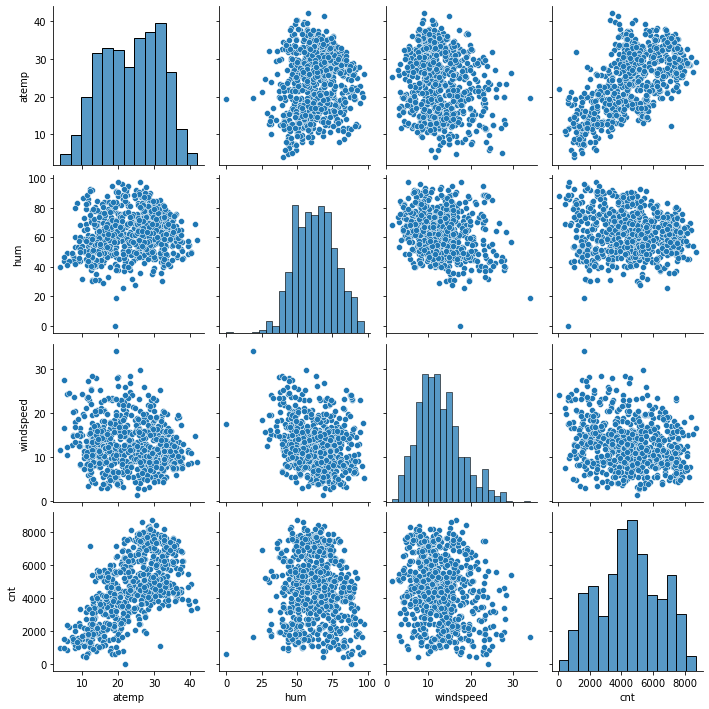

In [82]:
# visualizing numerical columns
sns.pairplot(df[['atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

There is a linear relationship between atemp, hum, windspeed and cnt.

***2. Error terms are normally distributed (not X, Y)***

In [83]:
y_train_pred = lm6.predict(X_train_rfe6_const)

In [84]:
# Residual Analysis
res = y_train - y_train_pred

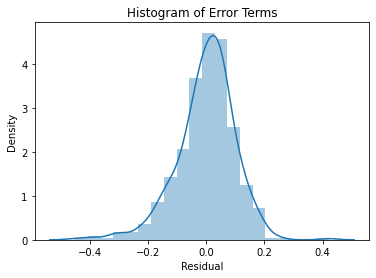

In [85]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins=20)
plt.xlabel('Residual')
plt.title("Histogram of Error Terms")
plt.show()

- This histogram shows that the residuals are normally distributed. Hence our assumption for Linear Regression is valid.

***3. Error terms are independent of each other***

In [86]:
error = y_train - y_train_pred

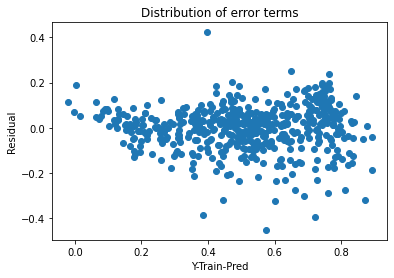

In [87]:
plt.figure()
plt.scatter(y_train_pred, error)
plt.xlabel("Y-Train-Pred")
plt.ylabel("Residual")
plt.title("Distribution of error terms")
plt.show()

 - With this scatter plot we can see that error values are not changing much with respect to y_train_pred.

***4. Error terms have constant variance (homoscedasticity)***

In [88]:
error = y_train - y_train_pred

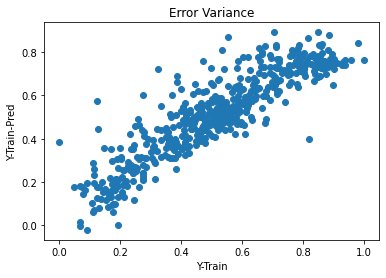

In [89]:
plt.figure()
plt.scatter(y_train, y_train_pred)
plt.xlabel("Y-Train")
plt.ylabel("Y-Train-Pred")
plt.title("Error Variance")
plt.show()

 - With this scatter plot we can see that error term has constant variance.

## Step 8: Making Predictions

Applying the scaling on the test sets

In [90]:
num_vars = ['atemp', 'hum', 'windspeed','cnt']

In [91]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

Dividing into X_test and y_test

In [92]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [93]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe6.columns]

# Adding a constant variable 
X_test_new_const = sm.add_constant(X_test_new)

In [94]:
# Making predictions

y_test_pred = lm6.predict(X_test_new_const)

## Step 9: Model Evaluation

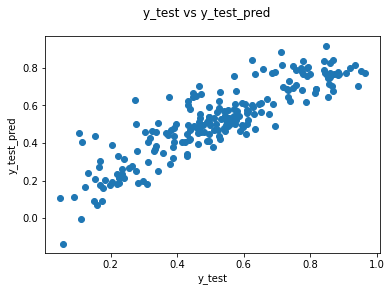

In [95]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred')               
plt.xlabel('y_test')                          
plt.ylabel('y_test_pred') 
plt.show()

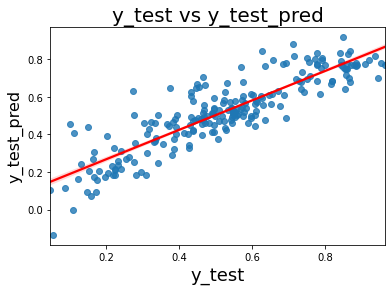

In [96]:
# Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True, line_kws={"color": "red"})

plt.title('y_test vs y_test_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_test_pred', fontsize=16)                     
plt.show()

### R^2 Value for test data

In [97]:
# Evaluate R-square for test

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_test_pred)

In [98]:
r2

0.7743873415615802

In [99]:
# n is number of rows in X
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

In [100]:
adjusted_r2

0.741313234565372

## Final Results Comparision

Train R^2 : 0.8000
<br>Test R^2  : 0.7743
<br> Train adjusted R^2 : 0.79
<br> Test adjusted R^2 : 0.74

This model has approximately same r2_score in training and testing data. Model is **'Generalizing'** for dataset.

We can see that the equation of our best fitted line is:

$$ cnt =  0.5997 \times atemp +   0.0869   \times Sep + 0.0606 \times Sat - 0.2503 \times Light Snow + 0.0752 \times summer + 0.1181 \times winter + 0.2348 \times yr   + 0.0488 \times workingday - 0.128581 \times windspeed + 0.0378$$

## Final Report for Management

**Positive Correlation**: With increasing variable demand increases.

- **atemp (Feeling Temperature)** : We can see that atemp has the highest coefficient 0.5997 i.e. if the feeling temperature increases by one unit and other variables don't change demand increases by 0.5997. Temp is highly correlated with feeling temperature. So we can consider any one of them.
- **Year** : We also see that with increasing year demand increases as well.  
- **Winter**
- **Sep**
- **Summer**
- **Sat**
- **workingday**

**Negative Correlation**: With increasing variable demand decrease.

- **Light Snow and Windspeed** : We also see Light Snow has negative coefficients i.e. if these variables increases then demand will decrease. It's coefficient values defines how much the demand will drop. 